In [39]:
"""
    使用numpy实现Boston房价预测
    Step1 数据加载，来源sklearn中的load_boston
    Step2 数据规范化，将X 采用正态分布规范化
    Step3 初始化网络
    Step4 定义激活函数，损失函数，学习率 epoch
    Step5 循环执行：前向传播，计算损失函数，反向传播，参数更新
    Step6 输出训练好的model参数，即w1, w2, b1, b2
""" 
import numpy as np
from sklearn.datasets import load_boston
from sklearn.utils import shuffle, resample
import matplotlib.pyplot as plt
np.random.seed(0)

In [40]:
# 数据加载
data = load_boston()                                            
X_ = data['data']                                                
y = data['target']                                              
# 将y转化为矩阵的形式                                          
y = y.reshape(y.shape[0],1)    

# 分为train和test集
y_test = y[450:]
y = y[:450]

# 数据规范化
# X_ = ((X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0))
X_ = ((X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0))

# 分为train和test集
X_test = X_[450:]
X_ = X_[:450]

In [41]:
print(X_.shape)
print(X_test.shape)
print(y.shape)

(450, 13)
(56, 13)
(450, 1)


In [42]:
"""
    初始化网络参数
    定义隐藏层维度，w1,b1,w2,b2
""" 
n_features = X_.shape[1]
n_hidden = 10
w1 = np.random.randn(n_features, n_hidden)
b1 = np.zeros(n_hidden)
w2 = np.random.randn(n_hidden, 1)
b2 = np.zeros(1)

In [43]:
# relu函数
def Relu(x):
    """ 这里写你的代码 """
    y = np.where(x<0,0,x)
    return y

def relu_gradient(z):
    g = np.array([(i>0) for i in z ])
    return g

Text(0, 0.5, 'g')

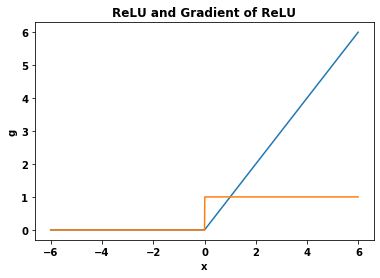

In [44]:
fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(1, 2, 2)
x = np.arange(-6, 6, 0.01)
f = Relu(x)
ax.plot(x, f)
f_prime = relu_gradient(x)
ax.plot(x, f_prime)
ax.set_title("ReLU and Gradient of ReLU")
ax.set_xlabel('x')
ax.set_ylabel('g')

In [45]:
# 设置学习率
learning_rate = 1e-6

# 定义损失函数
def MSE_loss(y, y_hat):
    """ 这里写你的代码 """
    return 1/(2*len(y_hat))*np.sum((y_hat - y)**2)

# 定义线性回归函数
def Linear(X, W, b):
    """ 这里写你的代码 """
    return X@W + b

In [46]:

# 5000次迭代
for t in range(5000):
# for t in range(1):
    # 前向传播，计算预测值y (Linear->Relu->Linear)
    """ 这里写你的代码 """
    Z1 = Linear(X_, w1, b1)
    A1 = Relu(Z1)
    Z2 = Linear(A1, w2, b2)
    A2 = Z2
    
    # 计算损失函数, 并输出每100次epoch的loss
    """ 这里写你的代码 """
    if (t+1) % 100 == 0:
        print('epoch: {}, loss: {}'.format(t+1 ,MSE_loss(y, A2)))

    # 反向传播，基于loss 计算w1和w2的梯度
    """ 这里写你的代码 """    
    dZ2 = A2 - y
    dW2 = 1/n_features *A1.T @ dZ2   
    dB2 = 1/n_features * np.sum(dZ2, axis = 0, keepdims = True )
    
    dZ1 = dZ2 @ w2.T * relu_gradient(Z1)
    dW1 = 1/n_features * X_.T @ dZ1
    dB1 = 1/n_features * np.sum(dZ1, axis = 0, keepdims = True )

    # 更新权重, 对w1, w2, b1, b2进行更新
    """ 这里写你的代码 """    
    w2 = w2 - learning_rate* dW2
    b2 = b2 - learning_rate * dB2
    w1 = w1 - learning_rate * dW1
    b1 = b1 - learning_rate * dB1


# 得到最终的w1, w2
print('w1={} \n w2={}'.format(w1, w2))
print('b1={} \n b2={}'.format(b1, b2))

epoch: 100, loss: 310.0649962723969
epoch: 200, loss: 266.07780207486246
epoch: 300, loss: 231.08572372010767
epoch: 400, loss: 202.6877400824396
epoch: 500, loss: 179.3966867969716
epoch: 600, loss: 160.2186142152388
epoch: 700, loss: 144.48804455322835
epoch: 800, loss: 131.59220757260417
epoch: 900, loss: 120.99421858117664
epoch: 1000, loss: 112.30080408501898
epoch: 1100, loss: 105.1320210776438
epoch: 1200, loss: 99.04519471571244
epoch: 1300, loss: 93.8219375185788
epoch: 1400, loss: 89.25911502010223
epoch: 1500, loss: 85.20672567186676
epoch: 1600, loss: 81.54096746989006
epoch: 1700, loss: 78.16315436543117
epoch: 1800, loss: 74.99935950784278
epoch: 1900, loss: 72.0289320443457
epoch: 2000, loss: 69.19967104876675
epoch: 2100, loss: 66.51607075406635
epoch: 2200, loss: 63.973236543634314
epoch: 2300, loss: 61.5385739979319
epoch: 2400, loss: 59.209749175344605
epoch: 2500, loss: 56.98998525612846
epoch: 2600, loss: 54.86777926065312
epoch: 2700, loss: 52.830395176723385
epoc

In [47]:

test_Z1 =  X_test @ w1 + b1
test_A1 = Relu(test_Z1)
test_y_hat = test_A1 @ w2 + b2


# 用test集来验证
print('test loss',MSE_loss(y_test, test_y_hat))

test loss 14.608358966817914
